# Block 45: Workshop (Solution)
## Handwritten Digit Recognition Using a Digit Classifier

## Scenario

You are tasked with creating a digit classifier that can accurately identify `handwritten digits` from the `MNIST dataset`. Your goal is to develop a neural network model using `PyTorch` to achieve this classification task. The dataset consists of images of handwritten digits (0-9), and you need to create a model that can classify them.

## Directions:  

* Import Necessary Libraries.  

   - Import essential libraries, including `matplotlib`, `numpy`, `torch`, and `torchvision`, to set up the environment for working with PyTorch and handling image data.


* Define Data Transformations.

   - Create a transformation pipeline (`transform`) to preprocess the images.

   - Transform the images into tensors and normalize pixel values to the range [-1, 1].


* Load MNIST Dataset.  

   - Load the `MNIST dataset` for both training and testing, applying the defined transformations.

   - Store the datasets in `trainset` and `testset`.


* Create Data Loaders.  

   - Set up data loaders to manage batching and shuffling of data during training and testing.

   - Configure a batch size of `64` for both training and testing.

   - Enable shuffling for the training set to randomize the order of data.


* Define a Function to Display Images.  

   -  Define a function called `imshow` to display images.

   -  Unnormalize the image data (reverse the normalization process).

   -  Ensure that images are displayed correctly, especially if they have RGB channels.


* Display Random Training Images.

   -  Extract a batch of random training images and their corresponding labels.

   -  Unnormalize and display the images in a grid format using the `imshow` function.

   -  Print the labels of the first `4 images` in the batch.


* Define a Custom Neural Network Model.

   -  Define a custom neural network model called `DigitClassifier` using PyTorch's `nn.Module`.

   -  Create `two fully connected` (linear) layers with `ReLU activation`.

   -  Specify the input size as `28x28` (MNIST image size) and the output size as `10` (for classifying digits 0-9).

   -  Implement the `forward` method to define how data flows through the network.

  

* Define Loss Function and Optimization Algorithm.  

   -  Define the loss function as the `Cross-Entropy Loss` using `nn.CrossEntropyLoss()`, suitable for classification tasks.

   -  Choose the `Stochastic Gradient Descent (SGD)` optimizer as `optim.SGD()` with a learning rate and momentum to update model weights.


* Training Loop.

   -  Set the number of training epochs as `10`.

   -  Iterate through each epoch and initialize the running loss.

   -  Loop through batches of training data and labels.

   -  Zero the gradients to prevent accumulation using `optimizer.zero_grad()`.

   -  Perform a `forward pass`, `compute the loss`, and `propagate gradients backward`.

   -  Update model weights using the `optimizer.Accumulate` the running loss for each batch.

   - Print the average loss for the current epoch.


* Evaluate the Model.  

   - Initialize variables for counting correct predictions and total examples.

   - Disable gradient tracking to save memory and computation during evaluation using `torch.no_grad()`.Iterate through the test data loader.

   - For each batch, calculate predictions using the trained model and determine the predicted class. Keep track of the correct predictions and the total count.

   - Calculate and print the accuracy on the test set.

1. Import Necessary Libraries
   - Import essential libraries, including `matplotlib`, `numpy`, `torch`, and `torchvision`, to set up the environment for working with PyTorch and handling image data.

In [1]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

2. Define data transformations
   - Create a transformation pipeline (`transform`) to preprocess the images.

   - Transform the images into tensors and normalize pixel values to the range [-1, 1].

In [2]:
# Compose a series of image transformations: Convert to tensor and normalize the pixel values to the range [-1, 1].
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

3. Load MNIST dataset
   - Load the `MNIST dataset` for both training and testing, applying the defined transformations.

   - Store the datasets in `trainset` and `testset`.

In [3]:
# Load the MNIST dataset for training and testing, applying the defined transformations.
trainset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 53.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.67MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.9MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.76MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



4. Create data loaders
   - Set up data loaders to manage batching and shuffling of data during training and testing.

   - Configure a batch size of `64` for both training and testing.

   - Enable shuffling for the training set to randomize the order of data.

In [4]:
# Create data loaders to handle batching and shuffling of data during training and testing.
# Batch size is set to 64, and data is shuffled for the training set.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# For the testing set, no shuffling is applied as we want to evaluate the model on the original order.
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
print("Training data shape:", len(trainset))
print("Test data shape:", len(testset))

Training data shape: 60000
Test data shape: 10000


**Observation**
The training dataset contains 60,000 data points.
The testing dataset contains 10,000 data points.
A batch size of 64 is used for both the training and testing data loaders.

5. Define a Function to Display Images
   -  Define a function called `imshow` to display images.

   -  Unnormalize the image data (reverse the normalization process).

   -  Ensure that images are displayed correctly, especially if they have RGB channels.

In [5]:
# Function to display images
def imshow(img):
    # Unnormalize the image data (since it was previously normalized).
    img = img / 2 + 0.5
    # Check if the image is in RGB format (3 channels) and convert it to RGB if necessary.
    if len(img.shape) == 3 and img.shape[0] == 3:
        img = np.transpose(img, (1, 2, 0))
    # Display the image using matplotlib with a grayscale colormap.
    plt.imshow(img, cmap='gray')
    plt.show()

6. Display Random Training Images
   -  Extract a batch of random training images and their corresponding labels.

   -  Unnormalize and display the images in a grid format using the `imshow` function.

   -  Print the labels of the first `4 images` in the batch.

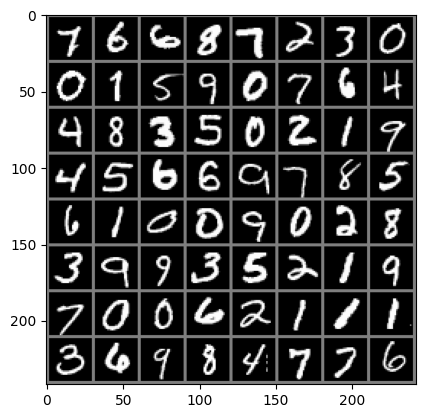

    7     6     6     8


In [6]:
# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images.
# Use the imshow function to display a grid of images.
imshow(torchvision.utils.make_grid(images))
# Print the labels of the first 4 images in the batch.
print(' '.join(f'{labels[j]:5d}' for j in range(4)))

7. Define a Custom Neural Network Model
   -  Define a custom neural network model called `DigitClassifier` using PyTorch's `nn.Module`.

   -  Create `two fully connected` (linear) layers with `ReLU activation`.

   -  Specify the input size as `28x28` (MNIST image size) and the output size as `10` (for classifying digits 0-9).

   -  Implement the `forward` method to define how data flows through the network.

In [7]:
# Define a custom neural network model for digit classification.
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        # Define the first fully connected layer with 28*28 input features and 128 output features.
        self.fc1 = nn.Linear(28 * 28, 128)
        # Apply the ReLU activation function to introduce non-linearity.
        self.relu = nn.ReLU()
        # Define the second fully connected layer with 128 input features and 10 output features (10 classes for digits 0-9).
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Flatten the input data by reshaping it to have a single dimension.
        x = x.view(x.size(0), -1)
        # Pass the flattened input through the first fully connected layer.
        x = self.fc1(x)
        # Apply the ReLU activation function.
        x = self.relu(x)
        # Pass the result through the second fully connected layer.
        x = self.fc2(x)
        return x

# Instantiate the DigitClassifier model.
model = DigitClassifier()


8. Define Loss Function and Optimization Algorithm
   -  Define the loss function as the `Cross-Entropy Loss` using `nn.CrossEntropyLoss()`, suitable for classification tasks.

   -  Choose the `Stochastic Gradient Descent (SGD)` optimizer as `optim.SGD()` with a learning rate and momentum to update model weights.

In [8]:
# Define the loss function (Cross-Entropy Loss) for classification.
criterion = nn.CrossEntropyLoss()

# Define the optimization algorithm (Stochastic Gradient Descent) with a learning rate and momentum.
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

9. Training Loop
   -  Set the number of training epochs as `10`.

   -  Iterate through each epoch and initialize the running loss.

   -  Loop through batches of training data and labels.

   -  Zero the gradients to prevent accumulation using `optimizer.zero_grad()`.

   -  Perform a `forward pass`, `compute the loss`, and `propagate gradients backward`.

   -  Update model weights using the `optimizer.Accumulate` the running loss for each batch.

   - Print the average loss for the current epoch.

In [9]:
# Training loop.
num_epochs = 10  # Number of times to iterate over the entire dataset.
for epoch in range(num_epochs):
    running_loss = 0.0  # Initialize the running loss for this epoch.
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data  # Get a batch of training data and labels.

        optimizer.zero_grad()  # Zero the gradients to prevent accumulation.

        outputs = model(inputs)  # Forward pass: compute predictions.
        loss = criterion(outputs, labels)  # Compute the loss.
        loss.backward()  # Backpropagation: compute gradients.
        optimizer.step()  # Update model weights using the computed gradients.

        running_loss += loss.item()  # Accumulate the loss for this batch.

    # Print the average loss for this epoch.
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

Epoch 1, Loss: 0.37691609253253
Epoch 2, Loss: 0.1874496111535092
Epoch 3, Loss: 0.13446642482168733
Epoch 4, Loss: 0.11048442785288574
Epoch 5, Loss: 0.09468318220885244
Epoch 6, Loss: 0.08131154782167559
Epoch 7, Loss: 0.07442549704464832
Epoch 8, Loss: 0.0647661637999852
Epoch 9, Loss: 0.058893819691797994
Epoch 10, Loss: 0.05349469755012701


**Record Observation:**
The provided code snippet demonstrates a typical training loop for a neural network. It iterates over the training dataset for a specified number of epochs (in this case, 10). Within each epoch, it processes batches of data using a for loop. The process includes forward pass, loss computation, backpropagation to compute gradients, and updating the model weights using an optimizer. The running loss for each epoch is accumulated and then printed, giving insight into the model's training progress. This training loop is a fundamental part of training neural networks, and it's essential for minimizing the loss and improving the model's performance over multiple iterations.

10. Evaluate the Model

   - Initialize variables for counting correct predictions and total examples.

   - Disable gradient tracking to save memory and computation during evaluation using `torch.no_grad()`.Iterate through the test data loader.

   - For each batch, calculate predictions using the trained model and determine the predicted class. Keep track of the correct predictions and the total count.

   - Calculate and print the accuracy on the test set.

In [10]:
correct = 0  # Initialize the count of correct predictions.
total = 0  # Initialize the count of total examples.

# Disable gradient tracking for evaluation to save memory and computation.
with torch.no_grad():
    # Iterate through the test data loader.
    for data in testloader:
        images, labels = data  # Get a batch of test data and labels.

        # Forward pass: compute predictions using the trained model.
        outputs = model(images)

        # Calculate the class with the highest probability as the predicted class.
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)  # Increment the total count by the batch size.
        correct += (predicted == labels).sum().item()  # Count correct predictions.

# Calculate and print the accuracy on the test set.
accuracy = (correct / total) * 100
print(f"Accuracy on the test set: {accuracy:.2f}%")


Accuracy on the test set: 97.77%


**Observation**
The accuracy of the model is given as above.